### Q learning with gridworld from AIMA book
<img src="./gridworld3.png" alt="" width="30%"/>  

  
    

In [1]:
import numpy as np
from pprint import pprint as pp

from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
def transition(s, a, deterministic=False, action_penalty=0.1):
    """given state s and action a, 
    return new state s' and reward r, 
    choice of the world being deterministic/non-deterministic
    """
    if deterministic:
        p=[1,0,0]
    else:
        p=[0.8,0.1,0.1]

    if s == (1,1): 
        if a == "up":
            choices = [((2,1), 0), ((1,1), 0), ((1,2), 0)]
        elif a == "down":
            choices = [((1,1), 0), ((1,1), 0), ((1,2), 0)]
        elif a == "right":
            choices = [((1,2), 0), ((2,1), 0), ((1,1), 0)]
        elif a == "left":
            choices = [((1,1), 0), ((1,1), 0), ((1,2), 0)]
    elif s == (2, 1):
        if a == "up":
            choices = [((3,1), 0), ((2,1), 0), ((2,1), 0)]
        elif a == "down":
            choices = [((1,1), 0), ((2,1), 0), ((2,1), 0)]
        elif a == "right":
            choices = [((2,1), 0), ((3,1), 0), ((1,1), 0)]
        elif a == "left":
            choices = [((2,1), 0), ((3,1), 0), ((1,1), 0)]
    elif s == (3, 1):
        if a == "up":
            choices = [((3,1), 0), ((3,1), 0), ((3,2), 0)]
        elif a == "down":
            choices = [((2,1), 0), ((3,1), 0), ((3,2), 0)]
        elif a == "right":
            choices = [((3,2), 0), ((3,1), 0), ((2,1), 0)]
        elif a == "left":
            choices = [((3,1), 0), ((3,1), 0), ((2,1), 0)]
    elif s == (1, 2):
        if a == "up":
            choices = [((1,2), 0), ((1,1), 0), ((1,3), 0)]
        elif a == "down":
            choices = [((1,2), 0), ((1,1), 0), ((1,3), 0)]
        elif a == "right":
            choices = [((1,3), 0), ((1,2), 0), ((1,2), 0)]
        elif a == "left":
            choices = [((1,1), 0), ((1,2), 0), ((1,2), 0)]
    elif s == (3, 2):
        if a == "up":
            choices = [((3,2), 0), ((3,3), 0), ((3,1), 0)]
        elif a == "down":
            choices = [((3,2), 0), ((3,3), 0), ((3,1), 0)]
        elif a == "right":
            choices = [((3,3), 0), ((3,2), 0), ((3,2), 0)]
        elif a == "left":
            choices = [((3,1), 0), ((3,2), 0), ((3,2), 0)]
    elif s == (1, 3):
        if a == "up":
            choices = [((2,3), 0), ((1,2), 0), ((1,4), 0)]
        elif a == "down":
            choices = [((1,3), 0), ((1,2), 0), ((1,4), 0)]
        elif a == "right":
            choices = [((1,4), 0), ((2,3), 0), ((1,3), 0)]
        elif a == "left":
            choices = [((1,2), 0), ((1,3), 0), ((2,3), 0)]
    elif s == (2, 3):
        if a == "up":
            choices = [((3,3), 0), ((2,3), 0), ("T", -1)]
        elif a == "down":
            choices = [((1,3), 0), ((2,3), 0), ("T", -1)]
        elif a == "right":
            choices = [("T", -1), ((3,3), 0), ((1,3), 0)]
        elif a == "left":
            choices = [((2,3), 0), ((3,3), 0), ((1,3), 0)]
    elif s == (3, 3):
        if a == "up":
            choices = [((3,3), 0), ((3,2), 0), ("T", 1)]
        elif a == "down":
            choices = [((2,3), 0), ((3,2), 0), ("T", 1)]
        elif a == "right":
            choices = [("T", 1), ((3,3), 0), ((2,3), 0)]
        elif a == "left":
            choices = [((3,2), 0), ((3,3), 0), ((2,3), 0)]
    elif s == (1, 4):
        if a == "up":
            choices = [("T", -1), ((1,4), 0), ((1,3), 0)]
        elif a == "down":
            choices = [((1,4), 0), ((1,4), 0), ((1,3), 0)]
        elif a == "right":
            choices = [((1,4), 0), ((1,4), 0), ("T", -1)]
        elif a == "left":
            choices = [((1,3), 0), ((1,4), 0), ("T", -1)]
    choices = [(s, r-action_penalty) for (s,r) in choices]
    return choices[np.random.choice(range(3), p=p)]


def pick_action(Q, s, epsilon=0.01):
    actions = ["up", "down", "right", "left"]
    explore = np.random.choice([1, 0], p=(epsilon, 1-epsilon))
    if explore:
        return np.random.choice(actions)
    else:
        Q_values = [Q[(s, a)] for a in actions]
        return actions[np.argmax(Q_values)]


def plot_state_Qs(state):
    plt.figure(dpi=200)
    for a in actions:
        plt.plot(range(len(history[state][a])), history[state][a], label=str(state)+" "+a)
    plt.xlabel("number of times visited")
    plt.ylabel("Q value")
    plt.legend()
    

def print_state_Qs(state):
    for a in actions:
        print(a, Q[(state,a)])

In [26]:
# initialization
states = [(1,1), (1,2), (1,3), (1,4),
          (2,1), (2,3), 
          (3,1), (3,2), (3,3), "T"]
actions = ["up", "down", "right", "left"]
Q = {}
for s in states:
    for a in actions:
        Q.update({(s, a): 0})


# parameters
alpha = 0.05
gamma = 0.9
action_penalty = 0.0
epsilon = 0.3
iterations = 1001
deterministic = False

# save state Q value history for plotting
history = {s: {a:[0] for a in actions} for s in states}


states_visited = {s:0 for s in states}
for i in range(iterations):
    s = np.random.choice(states)
    while True:
        states_visited[s] += 1
        if s == "T":
            break
        else:
            a = pick_action(Q, s, epsilon=epsilon)
            s_prime, r = transition(s, a, deterministic=deterministic,
                                    action_penalty=action_penalty)
            next_best_action = pick_action(Q, s_prime, epsilon=0)
            current_Q = Q[(s,a)]
            Q[(s,a)] = ((1-alpha)* current_Q + 
                alpha*(r + gamma*Q[(s_prime, next_best_action)]))
            history[s][a].append(Q[(s,a)])
            s = s_prime

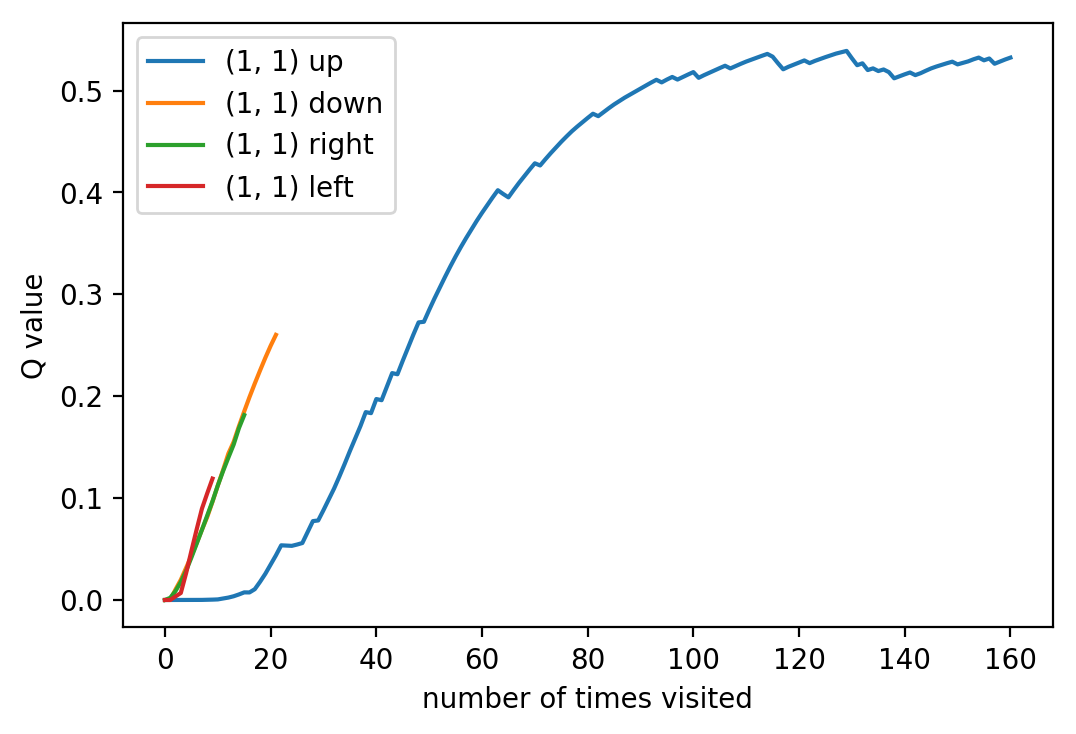

In [27]:
plot_state_Qs((1,1))

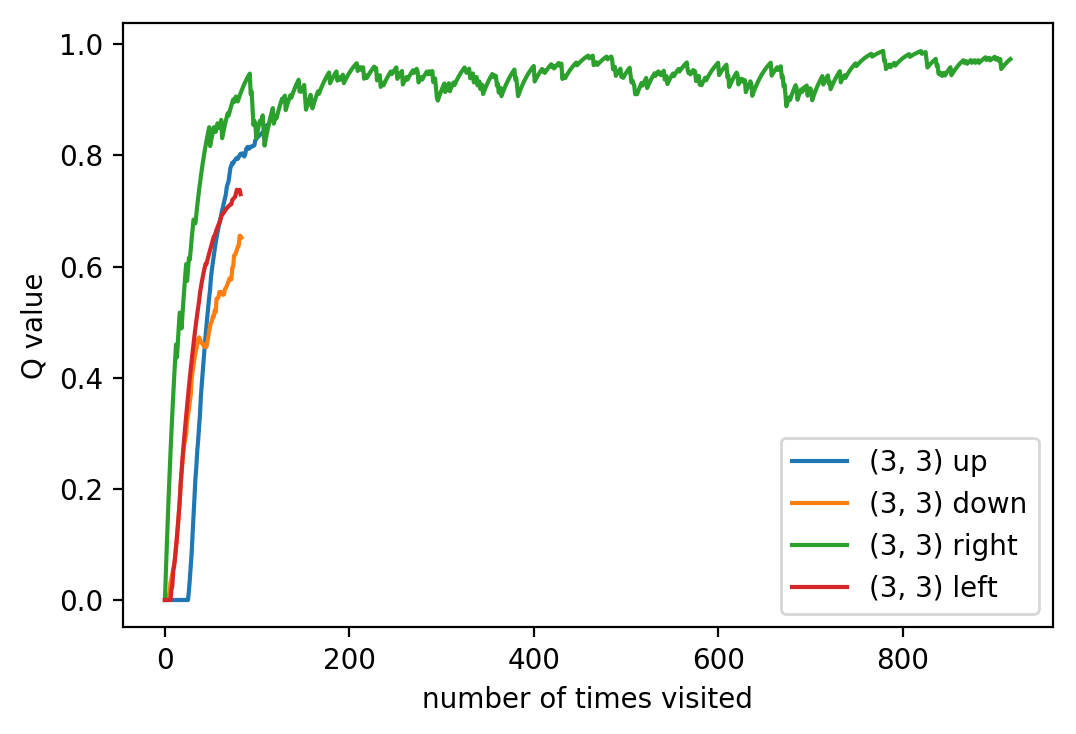

In [28]:
plot_state_Qs((3,3))

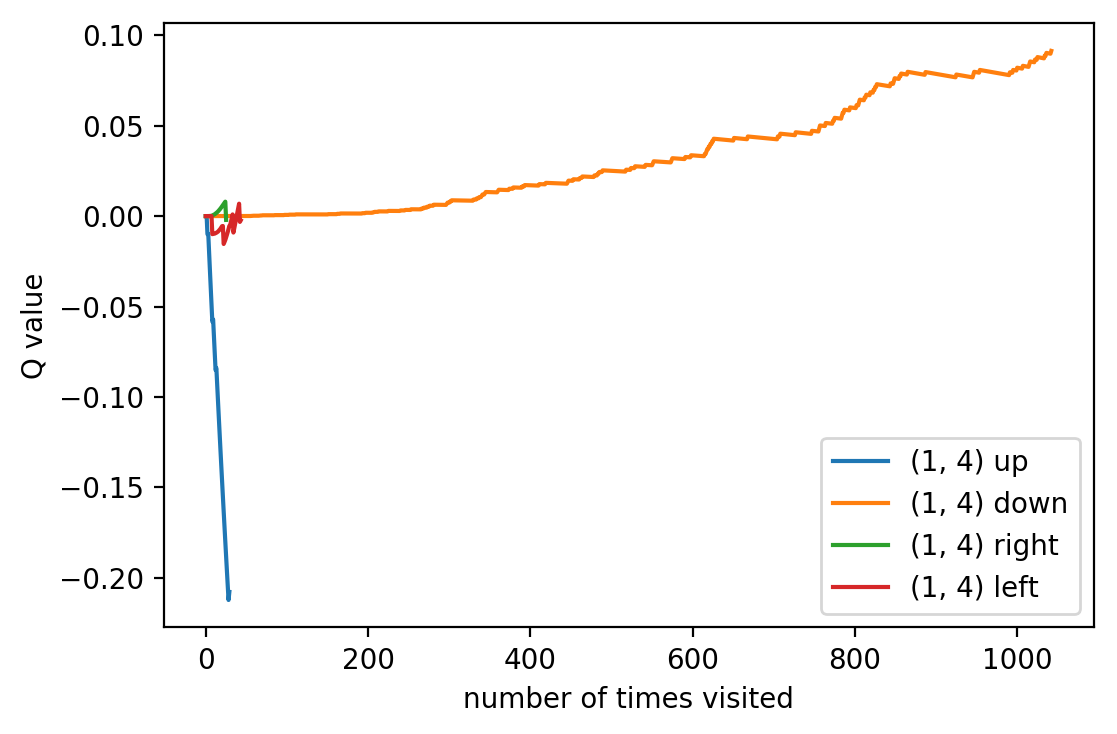

In [22]:
plot_state_Qs((1,4))